# World Population (EDA)

The folllowing is the list of possible EDA steps to prepare data for training a ML model. In this notebook, I address some of them.

## Steps to do:
1. Imports
2. Load data
3. Know/understand data
  
  3.1. df.shape

  3.2. df.head(), df.tail(), df.sample(5)

  3.3. df.info()

  3.4. df.describe(),

  3.5. df.select_dtype(include/exclude="number"/"categorical")

  3.6. Feature analysis: Correlation, Mutual Information, Statistical tests.

4. Remove duplicates
5. Null handling
6. Skewness handling for numerical data
7. Outlier Handling
8. Filter data for analysis
9. Scale the numeric data
10. Encode the categorical data
11. Feature engineering
  
  11.1. Dimensionality reduction (PCA, tSNE, UMAP)
  
  11.2. Manual Featuring

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AlexTheAnalyst/PandasYouTubeSeries/main/world_population.csv')

In [3]:
df.shape

(234, 17)

In [4]:
df.head(5)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225.0,43451666.0,39543154.0,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824.0,77700.0,71746.0,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.5641,1.0100,0.00


In [18]:
df = df.drop(['Rank'], axis=1)

In [51]:
df.sort_values(by="World Population Percentage", ascending=False).head(10)

,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
205,TZA,Tanzania,Dodoma,Africa,56004689.75,53196858.5,4.873569e+07,41490541.5,34463704.0,26206012.0,19297659.0,13618192.00,945087.00,69.3034,1.0300,0.685
213,TUR,Turkey,Ankara,Asia,56004689.75,53196858.5,4.873569e+07,41490541.5,38569462.5,29314013.0,24207514.5,21824501.75,783562.00,108.9145,1.0067,0.685
41,CHN,China,Beijing,Asia,56004689.75,53196858.5,4.873569e+07,41490541.5,38569462.5,29314013.0,24207514.5,21824501.75,1032757.25,146.8933,1.0000,0.685
156,PAK,Pakistan,Islamabad,Asia,56004689.75,53196858.5,4.873569e+07,41490541.5,38569462.5,29314013.0,24207514.5,21824501.75,881912.00,267.4018,1.0191,0.685
149,NGA,Nigeria,Abuja,Africa,56004689.75,53196858.5,4.873569e+07,41490541.5,38569462.5,29314013.0,24207514.5,21824501.75,923768.00,236.5759,1.0241,0.685
171,RUS,Russia,Moscow,Europe,56004689.75,53196858.5,4.873569e+07,41490541.5,38569462.5,29314013.0,24207514.5,21824501.75,1032757.25,8.4636,0.9973,0.685
131,MEX,Mexico,Mexico City,North America,56004689.75,53196858.5,4.873569e+07,41490541.5,38569462.5,29314013.0,24207514.5,21824501.75,1032757.25,64.9082,1.0063,0.685
27,BRA,Brazil,Brasilia,South America,56004689.75,53196858.5,4.873569e+07,41490541.5,38569462.5,29314013.0,24207514.5,21824501.75,1032757.25,25.2841,1.0046,0.685
55,COD,DR Congo,Kinshasa,Africa,56004689.75,53196858.5,4.873569e+07,41490541.5,38569462.5,29314013.0,24207514.5,20151733.00,1032757.25,42.2244,1.0325,0.685
193,ZAF,South Africa,Pretoria,Africa,56004689.75,53196858.5,4.873569e+07,41490541.5,38569462.5,29314013.0,24207514.5,21824501.75,1032757.25,49.0517,1.0084,0.685


In [35]:
# Identify columns with non-numerical data
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Drop or encode non-numerical columns before imputation
df_numeric = df.drop(non_numeric_cols, axis=1)
df_cat = df.drop(numeric_cols, axis=1)

In [53]:
df[numeric_cols].corr()

,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
2022 Population,1.000000,0.999560,0.997454,0.992550,0.983303,0.968201,0.954251,0.935934,0.700750,-0.127621,0.174341,0.999819
2020 Population,0.999560,1.000000,0.998892,0.994996,0.986202,0.972280,0.958710,0.940473,0.700866,-0.120211,0.165269,0.999629
2015 Population,0.997454,0.998892,1.000000,0.997899,0.992044,0.980292,0.967977,0.951530,0.694689,-0.119119,0.144662,0.997592
2010 Population,0.992550,0.994996,0.997899,1.000000,0.994580,0.986287,0.974418,0.956820,0.684824,-0.110580,0.145011,0.993234
2000 Population,0.983303,0.986202,0.992044,0.994580,1.000000,0.995302,0.988465,0.978177,0.667105,-0.092921,0.097397,0.983182
1990 Population,0.968201,0.972280,0.980292,0.986287,0.995302,1.000000,0.996401,0.986601,0.655358,-0.132968,0.081254,0.968497
1980 Population,0.954251,0.958710,0.967977,0.974418,0.988465,0.996401,1.000000,0.995500,0.640282,-0.127672,0.053260,0.954468
1970 Population,0.935934,0.940473,0.951530,0.956820,0.978177,0.986601,0.995500,1.000000,0.626294,-0.094994,0.026923,0.935464
Area (km²),0.700750,0.700866,0.694689,0.684824,0.667105,0.655358,0.640282,0.626294,1.000000,-0.412120,0.293214,0.703047
Density (per km²),-0.127621,-0.120211,-0.119119,-0.110580,-0.092921,-0.132968,-0.127672,-0.094994,-0.412120,1.000000,-0.191444,-0.122053


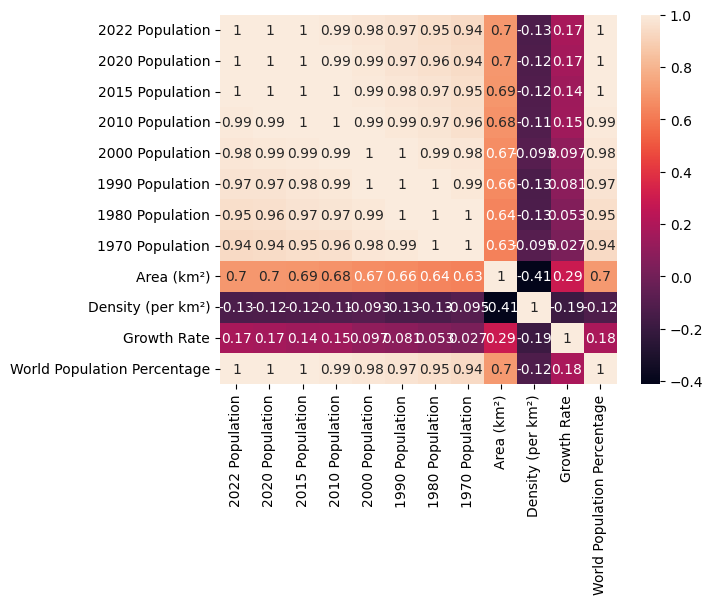

In [55]:
sns.heatmap(df[numeric_cols].corr(), annot = True)
plt.rcParams['figure.figsize'] = (20,7)
plt.show()

In [7]:
df.duplicated().sum()
df.drop_duplicates()

0

In [40]:
df.isnull().sum()

#-----------------------------------------
df1 = df.dropna()


#-----------------------------------------
from sklearn.impute import KNNImputer
df_numeric2 = KNNImputer().fit_transform(df_numeric)

df_numeric2 = pd.DataFrame(df_numeric2, columns=df_numeric.columns)
df_non_null = pd.concat((df_numeric2, df_cat), axis=1)

2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
dtype: int64

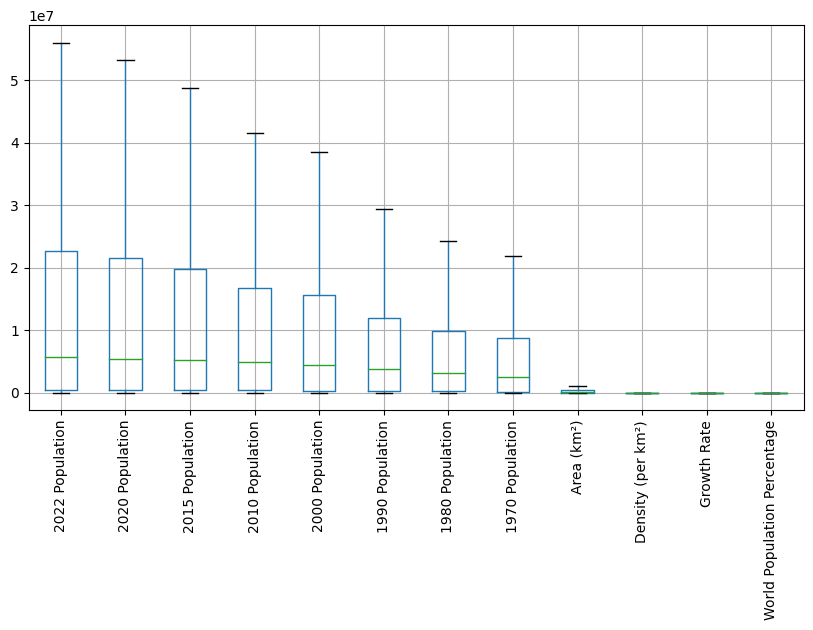

In [50]:
plt.figure(figsize=(10,5))
df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [47]:
def calculate_outliers_percentage(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Calculate outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)

    # Print the percentage of outliers for each column
    for column in outlier_counts:
        percentage = (outlier_counts[column] / len(df)) * 100
        print(f"Percentage of outliers in {column}: {percentage:.2f}%")

# Example usage:
calculate_outliers_percentage(df)

Percentage of outliers in 2022 Population: 10.68%
Percentage of outliers in 2020 Population: 11.11%
Percentage of outliers in 2015 Population: 11.54%
Percentage of outliers in 2010 Population: 12.82%
Percentage of outliers in 2000 Population: 12.39%
Percentage of outliers in 1990 Population: 12.82%
Percentage of outliers in 1980 Population: 13.25%
Percentage of outliers in 1970 Population: 11.97%
Percentage of outliers in Area (km²): 11.97%
Percentage of outliers in Density (per km²): 9.40%
Percentage of outliers in Growth Rate: 1.28%
Percentage of outliers in World Population Percentage: 10.68%


In [48]:
def handle_outliers(df):
    for column in numeric_cols:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Capping
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df

# Apply to both training and test datasets
df = handle_outliers(df)

In [49]:
calculate_outliers_percentage(df)

Percentage of outliers in 2022 Population: 0.00%
Percentage of outliers in 2020 Population: 0.00%
Percentage of outliers in 2015 Population: 0.00%
Percentage of outliers in 2010 Population: 0.00%
Percentage of outliers in 2000 Population: 0.00%
Percentage of outliers in 1990 Population: 0.00%
Percentage of outliers in 1980 Population: 0.00%
Percentage of outliers in 1970 Population: 0.00%
Percentage of outliers in Area (km²): 0.00%
Percentage of outliers in Density (per km²): 0.00%
Percentage of outliers in Growth Rate: 0.00%
Percentage of outliers in World Population Percentage: 0.00%


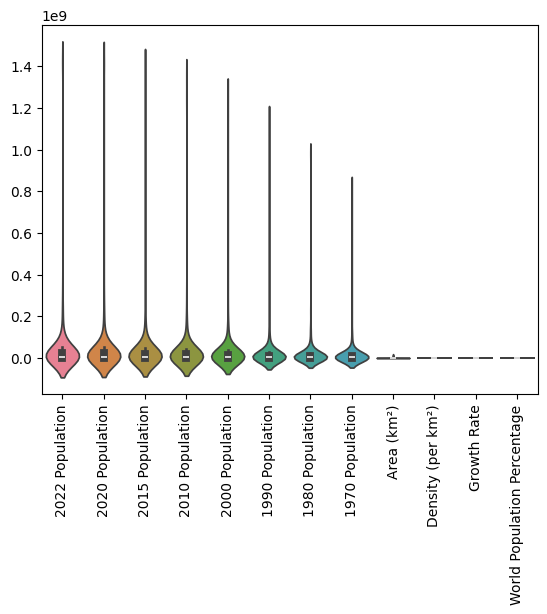

In [19]:
sns.violinplot(df)
plt.xticks(rotation=90)
plt.show()

In [69]:
# Group by 'Continent' and aggregate population data
population_agg = df.groupby('Continent')['2022 Population'].agg(['sum', 'mean', 'median', 'std']).reset_index()

# Rename columns for clarity
population_agg.columns = ['Continent', 'Total Population', 'Mean Population', 'Median Population', 'Population Std Dev']

# Display the aggregated table
population_agg.sort_values(by='Total Population', ascending=False)

,Continent,Total Population,Mean Population,Median Population,Population Std Dev
1,Asia,1.227234e+09,2.504559e+07,19397998.0,2.167730e+07
0,Africa,1.084244e+09,1.936151e+07,13564781.0,1.888180e+07
2,Europe,5.984805e+08,1.221389e+07,5023109.0,1.808668e+07
5,South America,2.775078e+08,1.982199e+07,15112555.0,2.014339e+07
3,North America,2.465115e+08,6.162788e+06,236399.0,1.358952e+07
4,Oceania,4.502050e+07,2.046386e+06,122698.0,5.874435e+06
